In [10]:
import matplotlib
rc_fonts = {
    "font.size": 14,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3dexp.db

In [11]:
df = pd.read_sql(
    'select (3*height*width / size) as compression_ratio, size from ImageMeta \
        where path like %s',
    s3dexp.db.engine,
    params=["%flickr50k%"])


<IPython.core.display.Javascript object>


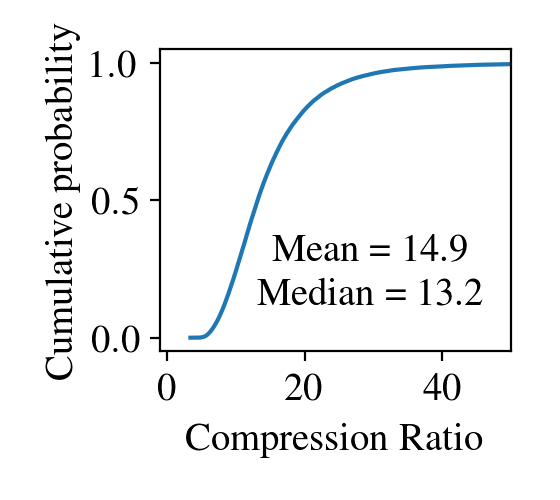

In [20]:
%matplotlib notebook

sorted_compression = np.sort(df['compression_ratio'])
p = 1. * np.arange(len(df))/(len(df) - 1)
plt.figure(figsize=(2.8, 2.5))
plt.tight_layout()
plt.plot(sorted_compression, p)
plt.xlabel('Compression Ratio')
plt.ylabel('Cumulative probability')
# plt.title('Compression ratio of YFCC100M Images')
plt.xlim(-1, 50)

ax = plt.gca()
# hack to show stats
# plt.plot([], [], '', label="99.2 Million Images")
# plt.plot([], [], '', label="Mean = %.1f" % np.mean(df['compression_ratio']))
# plt.plot([], [], '', label="Median = %.1f" %np.median(df['compression_ratio']))
# plt.legend(handlelength=0)

# 99.2 Million Images

plt.text(0.6, 0.26,
         'Mean = %.1f\nMedian = %.1f' 
         % (np.mean(df['compression_ratio']), np.median(df['compression_ratio'])),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.tight_layout()
plt.savefig('yfcc-compression-ratio.pdf', bbox_inches ='tight')


<IPython.core.display.Javascript object>


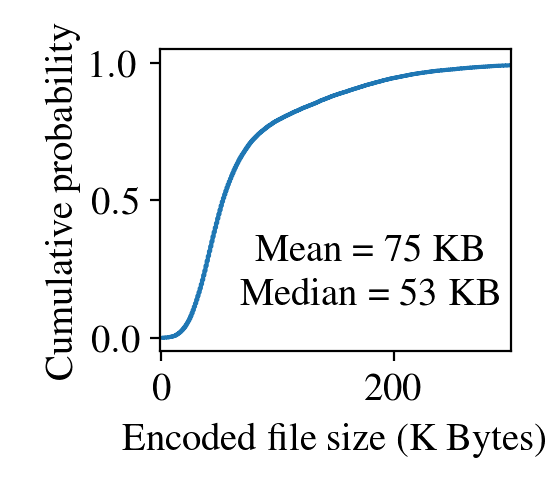

In [25]:
%matplotlib notebook

sorted_size = np.sort(df['size'])
p = 1. * np.arange(len(df))/(len(df) - 1)
plt.figure(figsize=(2.8, 2.5))
plt.tight_layout()
plt.plot(sorted_size / 1000, p)
plt.xlabel('Encoded file size (K Bytes)')
plt.ylabel('Cumulative probability')
plt.xlim(-1, 300)
# plt.title('File Size of YFCC100M Images')

ax = plt.gca()
# hack to show stats
# plt.plot([], [], '', label="99.2 Million Images")
# plt.plot([], [], '', label="Mean = %d KB" % np.mean(df['size']/1000))
# plt.plot([], [], '', label="Median = %d KB" %np.median(df['size']/1000))
# plt.legend(handlelength=0)

plt.text(0.6, 0.26,
         'Mean = %d KB\nMedian = %d KB' 
         % (np.mean(df['size']/1000), np.median(df['size']/1000)),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.tight_layout()
plt.savefig('yfcc-file-size.pdf', bbox_inches ='tight')

In [7]:
video_stats = pd.read_csv('/home/hturki/video_stats_VIRAT.csv')
compression_ratio = 8 * 3 * video_stats['width'] * video_stats['height'] * video_stats['fps'] / video_stats['bitrate'] / 1000

<IPython.core.display.Javascript object>


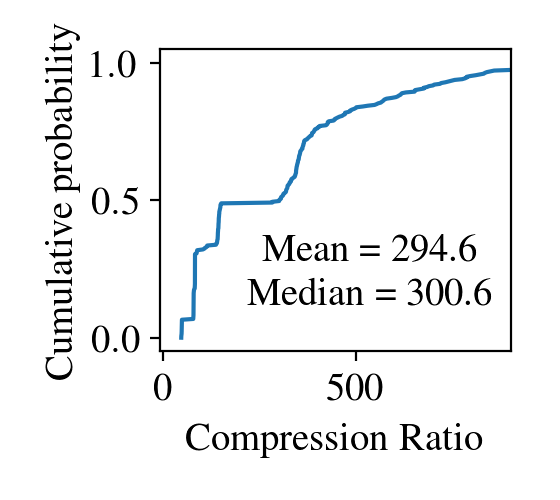

In [28]:
%matplotlib notebook

sorted_compression = np.sort(compression_ratio)
p = 1. * np.arange(len(compression_ratio))/(len(compression_ratio) - 1)
plt.figure(figsize=(2.8, 2.5))
plt.tight_layout()
plt.plot(sorted_compression, p)
plt.xlabel('Compression Ratio')
plt.ylabel('Cumulative probability')
plt.xlim(None, 900)
# plt.title('Compression Ratio of VIRAT Videos')

ax = plt.gca()

# hack to show stats
# plt.plot([], [], '', label="%d Videos" % len(video_stats))
# plt.plot([], [], '', label="Mean = %.1f" % np.mean(compression_ratio))
# plt.plot([], [], '', label="Median = %.1f" % np.median(compression_ratio))
# plt.legend(handlelength=0)

#353 videos
plt.text(0.6, 0.26,
         'Mean = %.1f\nMedian = %.1f'% (np.mean(compression_ratio), np.median(compression_ratio)),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.tight_layout()
plt.savefig('virat-compression-ratio.pdf', bbox_inches ='tight')

<IPython.core.display.Javascript object>


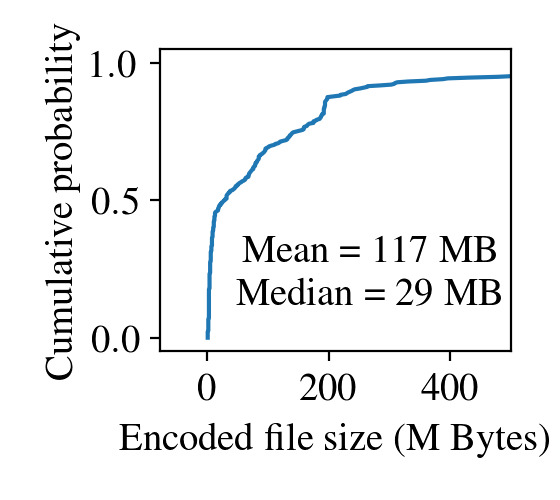

In [33]:
%matplotlib notebook

sorted_size = np.sort(video_stats['file_size']) # KB
p = 1. * np.arange(len(video_stats))/(len(video_stats) - 1)
plt.figure(figsize=(2.8, 2.5))
plt.tight_layout()
plt.plot(sorted_size/1000, p)
plt.xlabel('Encoded file size (M Bytes)')
plt.ylabel('Cumulative probability')
# plt.title('File Size of VIRAT Videos')
plt.xlim(None, 500)

ax = plt.gca()
# hack to show stats
# plt.plot([], [], '', label="%d Videos" % len(video_stats))
# plt.plot([], [], '', label="Mean = %d MB" % np.mean(video_stats['file_size']/1000))
# plt.plot([], [], '', label="Median = %d MB" % np.median(video_stats['file_size']/1000))
# plt.legend(handlelength=0)

plt.text(0.6, 0.26,
         'Mean = %d MB\nMedian = %d MB' 
         % (np.mean(video_stats['file_size']/1000), np.median(video_stats['file_size']/1000)),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.tight_layout()
plt.savefig('virat-file-size.pdf', bbox_inches ='tight')

In [ ]:
video_stats = pd.read_csv('/home/hturki/video_stats.csv')
compression_ratio = 8 * 3 * video_stats['width'] * video_stats['height'] * video_stats['fps'] / video_stats['bitrate'] / 1000

In [ ]:
%matplotlib notebook

sorted_compression = np.sort(compression_ratio)
p = 1. * np.arange(len(compression_ratio))/(len(compression_ratio) - 1)
plt.figure(figsize=(4,3))
plt.tight_layout()
plt.plot(sorted_compression, p)
plt.xlabel('Compression Ratio')
plt.ylabel('Cumulative probability')
plt.title('Compression Ratio of Okutama Videos')
plt.tight_layout()
plt.savefig('okutama-compression-ratio.pdf', bbox_inches ='tight')

In [ ]:
%matplotlib notebook

sorted_size = np.sort(video_stats['file_size'])
p = 1. * np.arange(len(video_stats))/(len(video_stats) - 1)
plt.figure(figsize=(4,3))
plt.tight_layout()
plt.plot(sorted_size, p)
plt.xlabel('Compressed file size (K Bytes)')
plt.ylabel('Cumulative probability')
plt.title('File Size of Okutama Videos')
plt.tight_layout()
plt.savefig('okutama-file-size.pdf', bbox_inches ='tight')